### CHARLES PAYET
### PYTHON PROJECT INDIVIDUAL
### MICROSOFT CORPORATION TWEET ANALYSIS

### Import Packages

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cpayet\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

### Apply Twitter credentials and export Data

In [2]:
#Twitter credentials for the app
consumer_key = '0yPhVjaVVREHyHAotHTKkP2Bu'
consumer_secret = 'AjdeogFA10mRMd7TJk3AxkXBPERvIm6uBNXeIuAj84nGFsR9PQ'
access_key= '951786147331694593-LpehpmwSidgAITCRL3VqNJ5DxSPBZNG'
access_secret = 'azfMczd8Glzl9FtGw20SdOJ4D9eMeDDs5oFNtVDb9GQ3g'

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
# Replace URLs found in a text string with nothing
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [5]:
# Create a custom search term and define the number of tweets
search_term = "Microsoft OR microsoft OR Microsoft+Corporation -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2019-12-01').items()

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [58]:
tweets_no_urls

['Microsoft Azure Certification Where to Start Microsoft Azure',
 'MrWolf15G madzgamingpl I think the absolute train wreck that was the Xbox Ones launch cant really be explained',
 'These 7 charts show all the ways Satya Nadella transformed Microsoft from a tech hasbeen to a trilliondollar gian',
 'Check out Microsoft Dynamics CRM Analyst in ChantilyVA job',
 'Dragonfyir I miss the days of the XBOX 360 when Microsoft was a formidable competitor and fought with great exclusive titles',
 'MemeCryptum I will be the martyrMicrosoft has been financially supporting it for a while nowBungie loves it b',
 'Market cap isnt power For both IBM amp Microsoft market power in one generation of tech didnt give them mark',
 'With 400 million users Microsoft knows cybersecurity technology should not be overlooked for improvement They lo',
 'spectatorindex Surprising that LG has more patents than Apple or Microsoft',
 'Dragonfyir The problem Microsoft has is they have done nothing to offer any incentive

### Cleaning Data and Defining Stop Words

In [59]:
# Make all elements in the list lowercase to create in a newt step a list of unique words,
# words with capitalization will be different from words that are all lowercase.

tweet_lower_case = [word.lower() for word in tweets_no_urls]

# Get all elements in the list
tweet_lower_case

['microsoft azure certification where to start microsoft azure',
 'mrwolf15g madzgamingpl i think the absolute train wreck that was the xbox ones launch cant really be explained',
 'these 7 charts show all the ways satya nadella transformed microsoft from a tech hasbeen to a trilliondollar gian',
 'check out microsoft dynamics crm analyst in chantilyva job',
 'dragonfyir i miss the days of the xbox 360 when microsoft was a formidable competitor and fought with great exclusive titles',
 'memecryptum i will be the martyrmicrosoft has been financially supporting it for a while nowbungie loves it b',
 'market cap isnt power for both ibm amp microsoft market power in one generation of tech didnt give them mark',
 'with 400 million users microsoft knows cybersecurity technology should not be overlooked for improvement they lo',
 'spectatorindex surprising that lg has more patents than apple or microsoft',
 'dragonfyir the problem microsoft has is they have done nothing to offer any incentive

In [41]:
# Create a list of lists containing lowercase words for each tweet
tweet_words = [tweet.split() for tweet in tweet_lower_case]
tweet_words[:]

[['microsoft',
  'azure',
  'certification',
  'where',
  'to',
  'start',
  'microsoft',
  'azure'],
 ['mrwolf15g',
  'madzgamingpl',
  'i',
  'think',
  'the',
  'absolute',
  'train',
  'wreck',
  'that',
  'was',
  'the',
  'xbox',
  'ones',
  'launch',
  'cant',
  'really',
  'be',
  'explained'],
 ['these',
  '7',
  'charts',
  'show',
  'all',
  'the',
  'ways',
  'satya',
  'nadella',
  'transformed',
  'microsoft',
  'from',
  'a',
  'tech',
  'hasbeen',
  'to',
  'a',
  'trilliondollar',
  'gian'],
 ['check',
  'out',
  'microsoft',
  'dynamics',
  'crm',
  'analyst',
  'in',
  'chantilyva',
  'job'],
 ['dragonfyir',
  'i',
  'miss',
  'the',
  'days',
  'of',
  'the',
  'xbox',
  '360',
  'when',
  'microsoft',
  'was',
  'a',
  'formidable',
  'competitor',
  'and',
  'fought',
  'with',
  'great',
  'exclusive',
  'titles'],
 ['memecryptum',
  'i',
  'will',
  'be',
  'the',
  'martyrmicrosoft',
  'has',
  'been',
  'financially',
  'supporting',
  'it',
  'for',
  'a',
  

In [42]:
# List of all words across tweets
all_words = list(itertools.chain(*tweet_words))

# Create counter
counts_words = collections.Counter(all_words)

counts_words.most_common(15)

[('microsoft', 32602),
 ('the', 20092),
 ('to', 16294),
 ('and', 12495),
 ('a', 11708),
 ('in', 9817),
 ('of', 8849),
 ('for', 8809),
 ('i', 7957),
 ('is', 7627),
 ('you', 6423),
 ('on', 6288),
 ('with', 5412),
 ('it', 4844),
 ('that', 3970)]

In [44]:
# Define a variable equal to all words we should delete
tweet_stop_words = set(stopwords.words('english'))

# View a few words from the set
list(tweet_stop_words)[0:10]

['too',
 'was',
 'again',
 "couldn't",
 'themselves',
 'here',
 'couldn',
 'isn',
 'mustn',
 'me']

In [45]:
# Remove stop words from each tweet list of words

tweets_nsw = [[word for word in tweet_word if not word in tweet_stop_words]
              for tweet_word in tweet_words]

tweets_nsw[0]

['microsoft', 'azure', 'certification', 'start', 'microsoft', 'azure']

### Prepare and plot data

In [46]:
# create a counter to return the most commonly used words and the number of times that they are used

all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('microsoft', 32602),
 ('xbox', 3485),
 ('new', 3137),
 ('windows', 3111),
 ('one', 2242),
 ('azure', 2196),
 ('google', 1822),
 ('office', 1745),
 ('north', 1614),
 ('like', 1606),
 ('2019', 1576),
 ('via', 1447),
 ('2020', 1431),
 ('cloud', 1409),
 ('microsofts', 1355)]

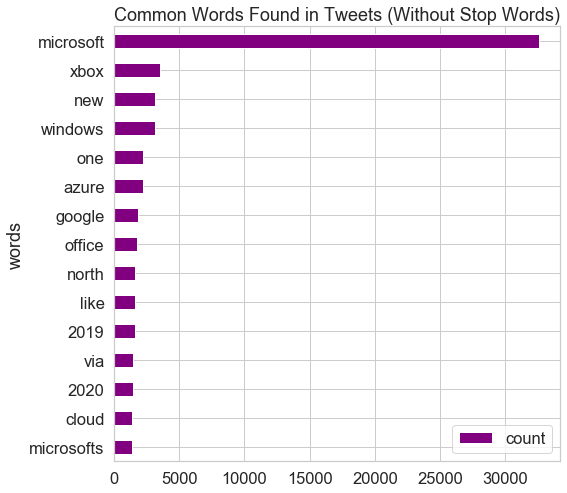

In [47]:
# Create a Dataframe and plot the word frequencies without the stop words

clean_tweets = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

### Define collection of words to remove

In [49]:
# Define a collection of words we don't want because they will be in almost all tweets
collection_words = ['Microsoft', 'Corporation', 'microsoft', 'corporation']
tweets_nsw_no_collection = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [50]:
tweets_nsw_no_collection[0]

['azure', 'certification', 'start', 'azure']

In [57]:
# Flatten list of words in clean tweets
all_words_nsw_no_collection = list(itertools.chain(*tweets_nsw_no_collection))

# Create counter of words in clean tweets
counts_nsw_no_collection = collections.Counter(all_words_nsw_no_collection)

counts_nsw_no_collection.most_common(30)

[('xbox', 3485),
 ('new', 3137),
 ('windows', 3111),
 ('one', 2242),
 ('azure', 2196),
 ('google', 1822),
 ('office', 1745),
 ('north', 1614),
 ('like', 1606),
 ('2019', 1576),
 ('via', 1447),
 ('2020', 1431),
 ('cloud', 1409),
 ('microsofts', 1355),
 ('apple', 1345),
 ('amazon', 1345),
 ('year', 1339),
 ('get', 1318),
 ('hackers', 1272),
 ('im', 1213),
 ('10', 1190),
 ('amp', 1158),
 ('free', 1112),
 ('check', 1080),
 ('using', 1076),
 ('use', 1050),
 ('word', 1047),
 ('game', 1013),
 ('dont', 1012),
 ('korean', 964)]

### Prepare and plot Data

In [52]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,xbox,3485
1,new,3137
2,windows,3111
3,one,2242
4,azure,2196


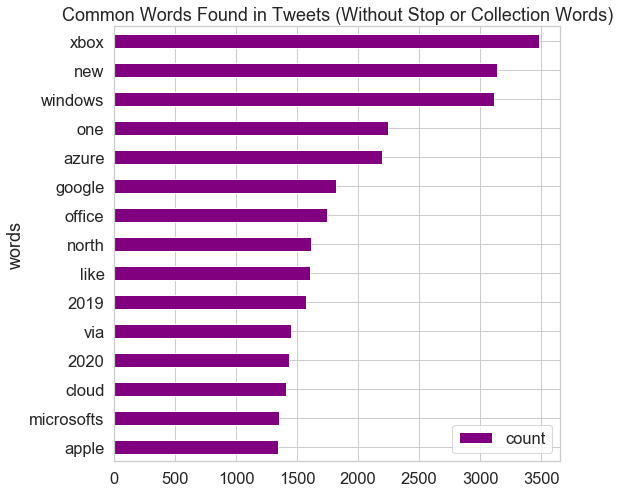

In [53]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()